# Ford GoBike System Data
## by Maggie Kiraga

## Preliminary Wrangling

> The following notebook explores a dataset containing a rental data history of more than half-million customers from the United States.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
trip_data = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# basic dataframe info
print(trip_data.shape)
print(trip_data.dtypes)
trip_data.head()

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
trip_data.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [5]:
# changing start and end time data types
trip_data['start_time'] = pd.to_datetime(arg=trip_data.start_time)
trip_data['end_time'] = pd.to_datetime(arg=trip_data.end_time)

In [6]:
# descriptive statistics for numeric variables
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### What is the structure of your dataset?

> This dataset consists of 519,700 bike trips, spread over a period of approximately six months. The dataframe is made of 13 variables, where most of them are numeric in nature. 

### What is/are the main feature(s) of interest in your dataset?

> My main goal of this project will be figuring out factors, which are associated with higher rental frequency as well as main bike trip characteristics like: trip duration or distance between rental points.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To investigate the above, I will mainly focus on the variables associated with time, location and distance. One of the variables that will be definitely incorporated into my visualizations will be the duration variable. To better assess the goal of this project, I will need to perform some transformations on the other variables. For example, I will calculate the distance between rental places, based on the latitude and longitude variables, or I will add an extra variable: 'week_day' into the dataframe, based on the start and end time (as I assume there might be some variability in rental frequency depending on the day of the week). 

## Univariate Exploration

> I will start by looking at the first variable from the dataframe: duration.

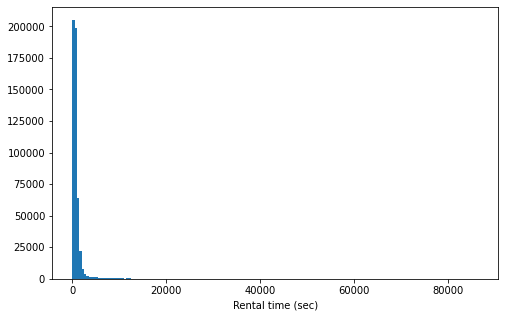

In [7]:
binsize = 500
bins = np.arange(0, trip_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xlabel('Rental time (sec)')
plt.show()

We can see that the distribution is highly skewed. As we can see in the above descriptive statistics section the 75 percentile and the maximum value of the duration variable are highly different, namely 15 minutes and about 24 hours respectively. Those extremely high duration values cause a deformed representation of the general pattern in the data. I will zoom-in the above figure a bit, to get a better look. 

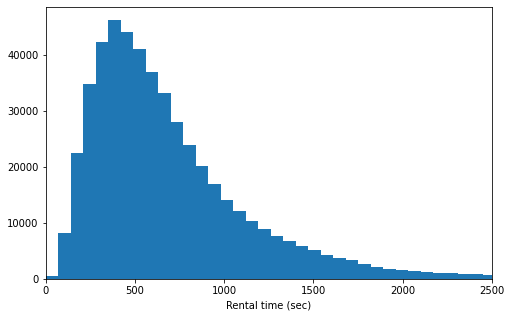

In [8]:
binsize = 70
bins = np.arange(0, trip_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xlabel('Rental time (sec)')
plt.xlim((0,2500))
plt.show()

When zooming-in, we can clearly see that bikes are most commonly rented for about 300-500 seconds (for about 5 to 8 minutes), with a steep decrease in the duration time above 700 seconds, resulting in a pretty long-tailed distribution for periods of longer rental duration. 

In [9]:
np.log10(trip_data['duration_sec'].describe())

count    5.715753
mean     3.041001
std      3.537082
min      1.785330
25%      2.582063
50%      2.775246
75%      2.972203
max      4.936358
Name: duration_sec, dtype: float64

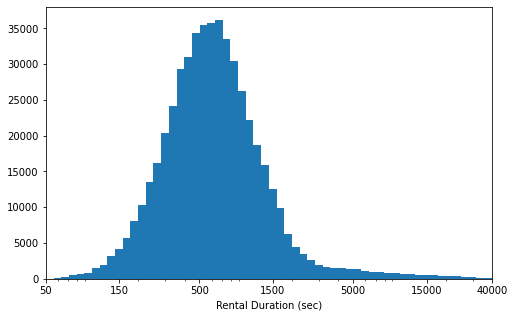

In [10]:
# there's a long tail on the one side of distribution, so I will fit the data with the log scale 

log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(trip_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50,150,500, 1500, 5000, 15000, 40000], [50,150,500, 1500, 5000, 15000,40000] )
plt.xlabel('Rental Duration (sec)')
plt.xlim((50,40000))
plt.show()

When transformed into a logarithmic scale, the duration variable is clearly unimodal, more than that it follows an almost perfect normal distribution curve. It's still pretty skewed to the right side, with most of the rental duration falling into the 150-1500 sec interval, and with a clear peak around 500 sec.

The scale of x-ticks (seconds) is quite unintuitive, therefore it seems to be a good idea to change the ticks into minutes. Later on, I will probably create a new variable containing duration time in hours, but for now, changing the ticks is good enough. 

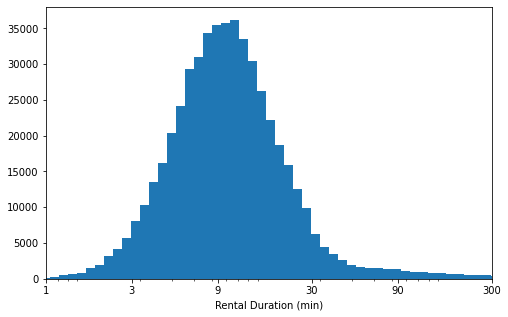

In [11]:
log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(trip_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 180, 540, 1800, 5400, 18000], [1, 3, 9, 30, 90, 300])
plt.xlabel('Rental Duration (min)')
plt.xlim((60,18000))
plt.show()

The above plot is clear and easy to interpret. We can see that most of the time rental time counts between 3 and 30 minutes, with a stepwise increase and the highest peak in the frequency when about 10 minutes. 

For the last part of the univariate exploration of this variable, I will take a closer look at its highest values, to investigate if they are any exceptionally high outliers indicating, for example, measurements' mistakes. 

In [12]:
# here I will select the values of 2500 sec and above, as they seem to be at the begin on the long tail in
# the second of the above figures 
high_outliers = (trip_data['duration_sec'] > 2700)
print(high_outliers.sum())
print(trip_data.loc[high_outliers,:])

20737
        duration_sec              start_time                end_time  \
0              80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1              78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2              45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3              62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4              43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   
...              ...                     ...                     ...   
519502         15195 2017-06-28 10:57:14.038 2017-06-28 15:10:29.812   
519568          3947 2017-06-28 12:07:52.653 2017-06-28 13:13:40.306   
519631          3819 2017-06-28 10:44:43.717 2017-06-28 11:48:23.636   
519636          5441 2017-06-28 10:11:30.636 2017-06-28 11:42:12.595   
519652          2950 2017-06-28 10:19:03.681 2017-06-28 11:08:14.413   

        start_station_id                                 start_station_name  \
0                     74                          

It looks like approximately 4% of the data frame (20,737 values) have duration time longer than 45 minutes (2,700 sec). Due to the fact that duration time is systematically increasing in values and due to the relatively high percentage of those values, it is very unlikely that those values are caused by some measurement's mistakes, and more likely they are a real representation of a strongly skewed data. Later on, in the bivariate visualizations section, it might be a good idea to investigate those low and high duration times separately. 

Next, I will move on to the visual exploration of the next variable: distance between rental places. First, I will need to do some data transformation to actually calculate a distance between two renting points. 

In [13]:
# here I will create a for loop that will calculate distance (in km) between two points
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 

In [14]:
# here I'm calling the above function and adding a new distance variable into the dataframe, based on latitude 
# and longitude
dist_v = np.vectorize(distance)
trip_data["distance"] = dist_v(
    trip_data.start_station_longitude,
    trip_data.start_station_latitude,
    trip_data.end_station_longitude,
    trip_data.end_station_latitude
)

In [15]:
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1.155357
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3.070483
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,0.569998
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,0.795410


In [16]:
trip_data.distance.describe()

count    519700.000000
mean          1.371373
std           0.947040
min           0.000000
25%           0.755997
50%           1.149175
75%           1.773393
max          64.751982
Name: distance, dtype: float64

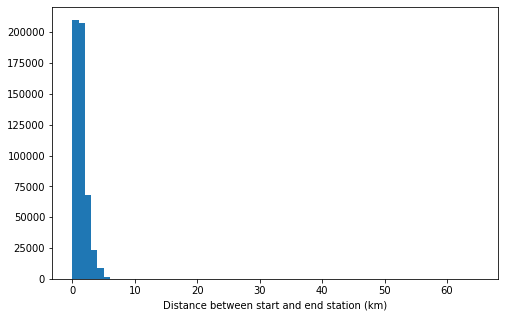

In [17]:
binsize = 1
bins = np.arange(0, trip_data['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'distance', bins = bins)
plt.xlabel('Distance between start and end station (km)')
plt.show()

Similarly to the above example, the distribution for this variable seems to be highly skewed to the right, which deforms the figure pretty badly. Let's zoom-in quite a bit to get a closer look at the values. 

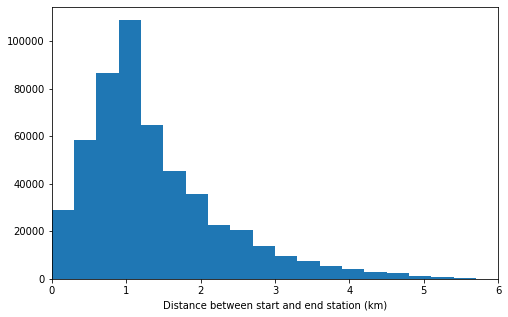

In [18]:
binsize = 0.3
bins = np.arange(0, trip_data['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'distance', bins = bins)
plt.xlabel('Distance between start and end station (km)')
plt.xlim((0,6))
plt.show()

Here we can clearly see that it's a unimodal variable, with the peak values about 1 km, and long right-sided tail, where the distance of 5km and above are highly rare and its frequency almost invisible on the graph. 

Next, let's take a better look on the extreemly low and extreemly high values. From the above figure, it seems like there is a lot values with 0 km distance between start and end station. Let's doubble check it! 

In [19]:
same_station = sum(trip_data[['start_station_longitude','start_station_latitude']].values == trip_data[['end_station_longitude','end_station_latitude']].values)
same_station

array([18134, 18134])

It appears that customers were bringing the bikes to the same rental station 18,134 times, which is about 3,5%  of the total data. Therefore, the extremely low distance values from the last figure seem to be legit. 

Now, let's move on and take a look at the other side of the spectrum: the extremely high data points of the distance variable. 

In [20]:
# on the above figure we can see that distance above 6 km is extremely rare, that's why I will set this value
# as the threshold for high outliers
high_outliers = (trip_data['distance'] > 6)
print(high_outliers.sum())
print(trip_data.loc[high_outliers,:])

131
        duration_sec              start_time                end_time  \
5241            1356 2017-12-28 16:31:49.723 2017-12-28 16:54:26.700   
10184           5825 2017-12-25 12:53:25.235 2017-12-25 14:30:30.292   
10185           5817 2017-12-25 12:53:21.164 2017-12-25 14:30:18.464   
15670           1809 2017-12-21 14:44:00.616 2017-12-21 15:14:10.474   
17053           1420 2017-12-21 07:40:49.619 2017-12-21 08:04:30.157   
...              ...                     ...                     ...   
502659         20267 2017-07-14 13:58:59.235 2017-07-14 19:36:46.340   
502744         13212 2017-07-14 15:05:28.456 2017-07-14 18:45:40.999   
502745         13203 2017-07-14 15:05:23.876 2017-07-14 18:45:27.467   
503736          3451 2017-07-14 08:39:57.891 2017-07-14 09:37:29.436   
508137         10235 2017-07-11 12:45:56.342 2017-07-11 15:36:32.324   

        start_station_id           start_station_name  start_station_latitude  \
5241                 230      14th St at Mandela P

Here the investigation of the outliers showed that only about 0.03% (131 values) of the data has values higher than 6 km between start and end station. This is a very trivial proportion of the whole dataset, and due to the huge differences between the values, eg. the 75 percentile mark is just below 2 km, whereas the max value is above 64 km, it seems reasonable to drop those high outliers as they might later on strongly disturb the visualizations, without bringing any extra significant information. 

In [21]:
trip_data = trip_data.loc[-high_outliers,:]

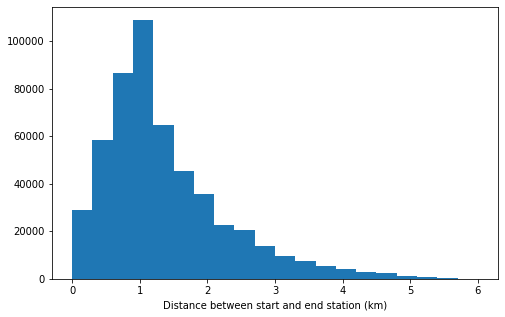

In [22]:
binsize = 0.3
bins = np.arange(0, trip_data['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'distance', bins = bins)
plt.xlabel('Distance between start and end station (km)')
plt.show()

So, this is how the graph looks like after dropping the high outliers values. The distribution basically didn't change at all, the peak distance between the stations is still about 1 km, however, the x-axis looks much better, with a clear starting and ending point, and we don't have to zoom-in anymore to get a good view on the data. 

Last two important variables that left to explore by means on univariate visualizations are start and end rental stations. Here I will only plot the data for ten most popular rental places, as plotting a figure for each of the rental stations from the dataframe would lack clarity and make the interpretation of the results extremely difficult. 

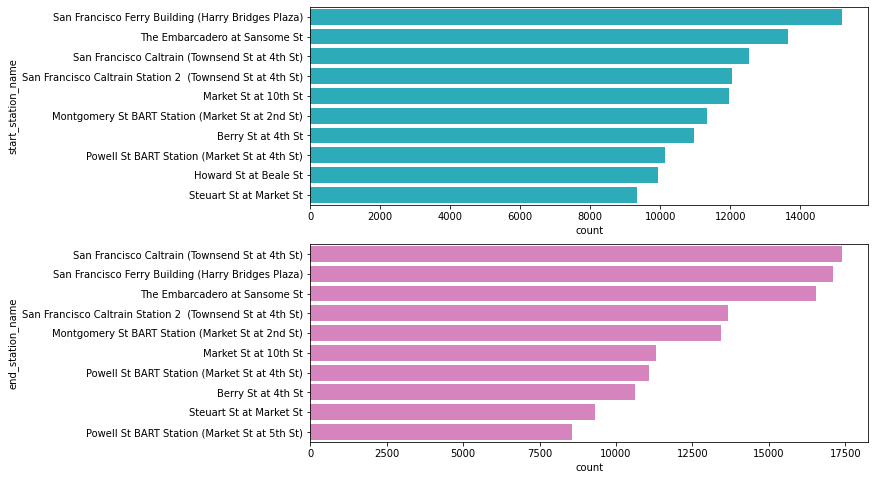

In [23]:
plt.figure(figsize = [10, 8])
blue = sb.color_palette()[9]
pink = sb.color_palette()[6]

plt.subplot(2, 1, 1)
# ordering the start start stations by their popularity
start_stations = trip_data['start_station_name'].value_counts()
# selecting the top 10 station with the highest count
top_start_stations = start_stations.index[:10]
trip_data_sub = trip_data.loc[trip_data['start_station_name'].isin(top_start_stations)]
sb.countplot(data=trip_data_sub, y='start_station_name', color=blue,
             order=trip_data_sub['start_station_name'].value_counts().index[:10])

plt.subplot(2, 1, 2)
end_stations = trip_data['end_station_name'].value_counts()
top_end_stations = end_stations.index[:10]
trip_data_sub = trip_data.loc[trip_data['end_station_name'].isin(top_end_stations)]
sb.countplot(data=trip_data_sub, y='end_station_name', color=pink,
            order=trip_data_sub['end_station_name'].value_counts().index[:10])
plt.show()

The above two plots represent value counts, separately for the start and end locations of the 10 most popular renting stations. There is quite a big gap in popularity between the most and the least popular station from the ranking, especially so for the end stations, namely the most popular: San Francisco Caltrain was visited about 17,000 times when the number 10 from the ranking: Powell St BART Station, just about 9,000 times. Although those two stations are situated in close proximity to each other (1.5km), the former one lies next to the big train station, which might be sufficient enough to boost the popularity of the rental location. Another interesting fact is that three of the most popular start-renting stations are also the three most popular end-renting stations, although in a different order. That's why later on, when performing the bivariate visualizations, I will focus only on the top three starting locations, to simplify the interpretation of the results. 

To finalize the univariate visualization of the data, I will add an extra variable into the data frame, namely a weekday, based on the start and end time variables. This will help me to discover any patterns in the data that might be associated with a specific day of the week.

In [24]:
# creating a list object with weekdays, ordered
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# adding week day columns into the dataframe using bulit-in weekday function
trip_data['week_day_start'] = trip_data.apply(lambda row: week_days[row["start_time"].weekday()], axis=1)
trip_data['week_day_end'] = trip_data.apply(lambda row: week_days[row["end_time"].weekday()], axis=1)
trip_data.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance,week_day_start,week_day_end
101617,828,2017-11-27 11:40:28.917,2017-11-27 11:54:16.939,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,98,Valencia St at 16th St,37.765052,-122.421866,1679,Customer,0.905867,Monday,Monday
505068,1703,2017-07-13 13:02:30.754,2017-07-13 13:30:53.807,323,Broadway at Kearny,37.798014,-122.405950,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,753,Customer,0.759220,Thursday,Thursday
404818,3108,2017-08-27 12:10:42.665,2017-08-27 13:02:30.889,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,6,The Embarcadero at Sansome St,37.804770,-122.403234,2183,Customer,1.604514,Sunday,Sunday
101168,1760,2017-11-27 14:53:58.715,2017-11-27 15:23:18.932,181,Grand Ave at Webster St,37.811377,-122.265192,195,Bay Pl at Vernon St,37.812314,-122.260779,3084,Subscriber,0.493952,Monday,Monday
331417,367,2017-09-19 15:58:31.023,2017-09-19 16:04:38.397,119,18th St at Noe St,37.761047,-122.432642,98,Valencia St at 16th St,37.765052,-122.421866,655,Subscriber,1.221756,Tuesday,Tuesday
142328,474,2017-11-12 10:26:17.692,2017-11-12 10:34:12.079,63,Bryant St at 6th St,37.775910,-122.402575,48,2nd St at S Park St,37.782411,-122.392706,437,Subscriber,1.163731,Sunday,Sunday
162745,829,2017-11-06 17:23:41.587,2017-11-06 17:37:30.788,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,74,Laguna St at Hayes St,37.776435,-122.426244,597,Subscriber,2.445720,Monday,Monday
257363,308,2017-10-10 16:20:30.766,2017-10-10 16:25:38.896,72,Page St at Scott St,37.772406,-122.435650,86,Market St at Dolores St,37.769305,-122.426826,1166,Subscriber,0.998476,Tuesday,Tuesday
471208,626,2017-08-01 17:53:01.051,2017-08-01 18:03:27.404,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,18,Subscriber,0.953858,Tuesday,Tuesday
200982,226,2017-10-26 13:33:01.535,2017-10-26 13:36:48.272,8,The Embarcadero at Vallejo St,37.799953,-122.398525,16,Steuart St at Market St,37.794130,-122.394430,2881,Subscriber,0.572436,Thursday,Thursday


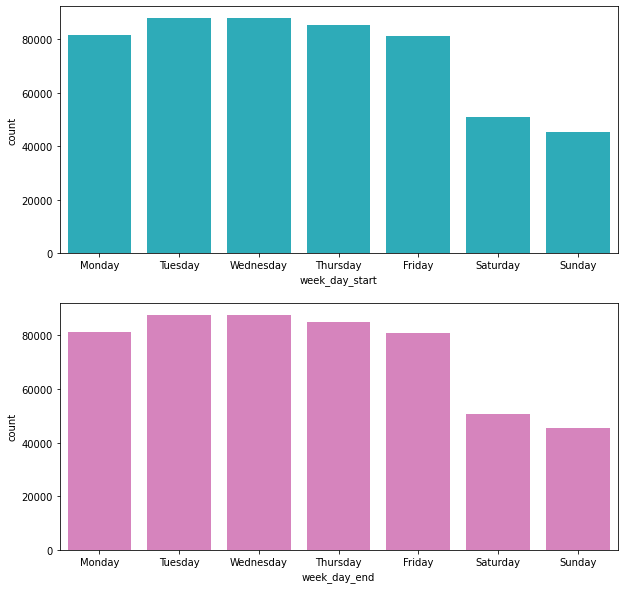

In [25]:
# plotting barcharts for the new week day columns
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sb.countplot(data = trip_data, x='week_day_start', color=blue, order=week_days)

plt.subplot(2,1,2)
sb.countplot(data = trip_data, x='week_day_end', color=pink, order=week_days)
plt.show()

It looks like the busiest days are Tuesday and Wednesday, being almost equally busy. Interestingly, the weekends are shown to be much less busy than the rest of the week, with Sunday's having the least number of customers. Another interesting observation is that the plots of start and end renting days look exactly the same, suggesting the same distribution of values. Let's double-check it!  

In [26]:
print(trip_data.week_day_start.value_counts())
print(trip_data.week_day_end.value_counts())

Tuesday      87849
Wednesday    87728
Thursday     85232
Monday       81398
Friday       81134
Saturday     50849
Sunday       45379
Name: week_day_start, dtype: int64
Tuesday      87807
Wednesday    87776
Thursday     85190
Monday       81465
Friday       81050
Saturday     50818
Sunday       45463
Name: week_day_end, dtype: int64


In [27]:
same_day = np.where((trip_data['week_day_start'] == trip_data['week_day_end']), 0, 1)
print(same_day.sum())
print((same_day.sum() * 100) / len(trip_data))

2048
0.39417286250719347


It looks like that just about 0.4% of bikes in the dataset were returned to a rental place on a different day. Almost all the bikes were returned the very same day to a rental station. It aligns with the above exploration of the duration variable, which showed that most of the bikes were rented for a couple of minutes or hours. Due to a trivial variability between the start and end weekday variables, in the following exploration, I will only focus on the start renting days, as it will bring more clarity into visualizations, and none additional information could be gain by creating separate plots. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * Both duration and distance variable shown to be strongly skewed to the right, having a long tail of extremely high values. The shape of the histogram of the duration variable suggested a logarithmic transformation might be actually useful here. After transformation, the duration variable, followed a normal distribution curve, with a clear peak of values that were having quite a long right-skewed tail. Investigation of these extremely high values didn't suggest any entry mistakes and its character stepwise character suggests real data points. 
* The distance variable was also investigated for the outliers due to its strongly right-skewed distribution. This investigation showed that a marginal portion of the data set (0.03%) has extremely different values, which strongly deformed the visualizations. It seemed reasonable to drop those values from the dataset. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * To easier the interpretation of the duration plot, I changed the labels of ticks from second to minutes. 
* I added three new variables into the dataset, based on existing ones. The first one was distance, which describes the distance between the starting and ending rental stations in kilometers and was calculated based on the longitude and latitude variables. The other two were variables naming day of the week based on the start and end of rental dates.
* Lastly, I also created a subset of dataframe containing only the 10 most popular renting stations. 

## Bivariate Exploration

> I will start the bivariate visualizations by plotting the relationship between the two categorical variables, namely weekday and station name. Here, I chose only the top three most popular stations to increase the clarity of the plots. 

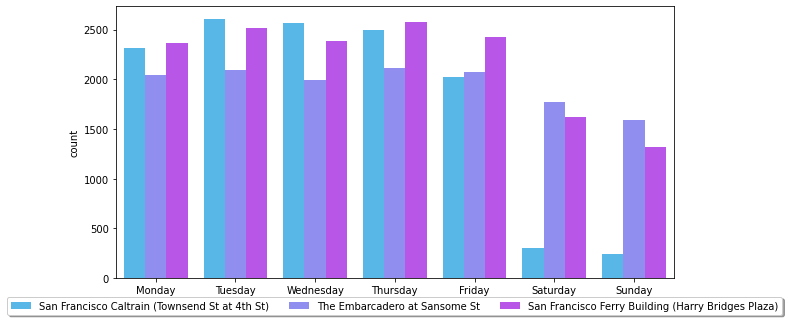

In [30]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

top_3_stations = start_stations.index[:3]
trip_data_sub = trip_data.loc[trip_data['start_station_name'].isin(top_3_stations)]
sb.countplot(data=trip_data_sub, x='week_day_start', hue='start_station_name', order=week_days,
             palette='cool')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.show()

On the above plot, we can see that the station by the San Francisco Ferry Building is most popular in almost all of the days. However, the differences between the 1st and 2nd most popular renting stations are quite small, this is in contrast to the third most popular station, which most of the time is only half as busy as the other two stations. Interesting is also the fact that all rental stations have a much higher number of customers on the weekdays (from Mon till Fri) than at the weekends. 

Next, I will move to investigating the relationship between the two numeric variables of interest: distance and duration

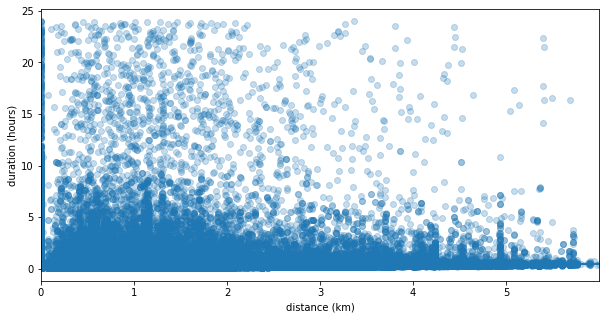

In [31]:
# first I will add an extra column into the dataset with duration variable represented in hours instead of sec
trip_data['duration_h'] = trip_data['duration_sec'] / 3600

plt.figure(figsize=(10,5))
sb.regplot(data=trip_data, x='distance', y='duration_h', scatter_kws = {'alpha' : 0.25})
plt.xlabel('distance (km)')
plt.ylabel('duration (hours)')
plt.show()

This plot shows that there is basically no relationship between distance and duration variable. Although there are significantly more data points in the lower part of the figure (shorter duration), the points are randomly distributed between two axes. 

Due to the fact that the plot looks really crowded, I will go ahead and plot those variables based on a sample of data, to see if any interesting pattern occurs. I will also plot the rest of the figures in the section based on the sample measurements, as the above figure took pretty long to run. 

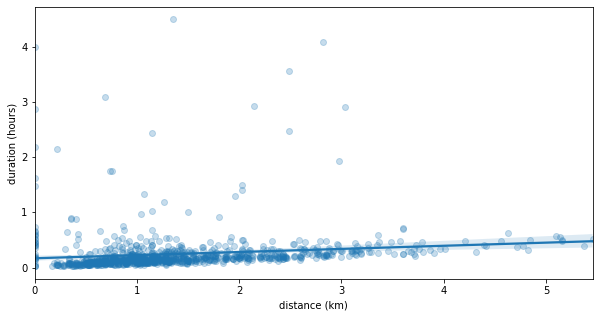

In [35]:
samples = np.random.choice(trip_data.shape[0], 1000, replace = False)
data_sample = trip_data.loc[samples,:]

plt.figure(figsize=(10,5))
sb.regplot(data=data_sample, x='distance', y='duration_h', scatter_kws = {'alpha' : 0.25})
plt.xlabel('distance (km)')
plt.ylabel('duration (hours)')
plt.show()

Similarly, on this figure we can also see that there is no relationship between the distance variable and for how long the bike war rented. 

Next, I will explore the relationship between the two numeric variables (duration and distance) and the categorical variable: weekday. 

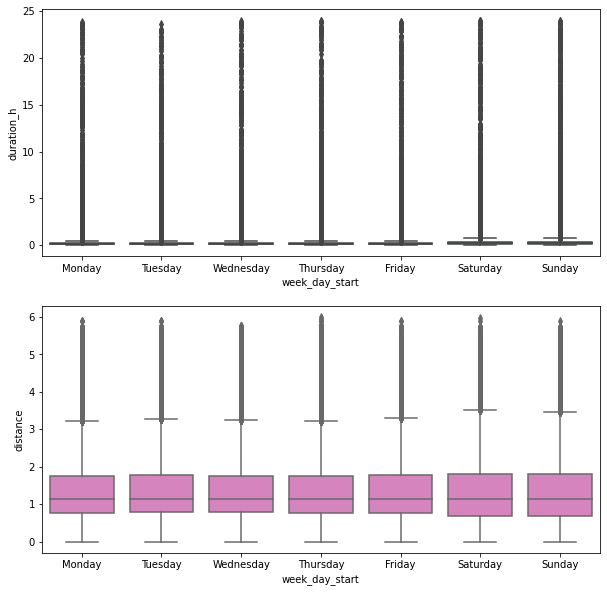

In [36]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sb.boxplot(data=trip_data, x='week_day_start', y='duration_h', color=blue, order=week_days)

plt.subplot(2,1,2)
purple = sb.color_palette()[6]
sb.boxplot(data=trip_data, x='week_day_start', y='distance', color=purple, order=week_days)
plt.show();

The above part of the subplot is very hard to interpret due to very long tail with high duration values, which we also saw in the univariate explorations of this variable, where we noticed that most of the duration time is under 2 hours. Let's zoom-in a bit for a better look at the data.

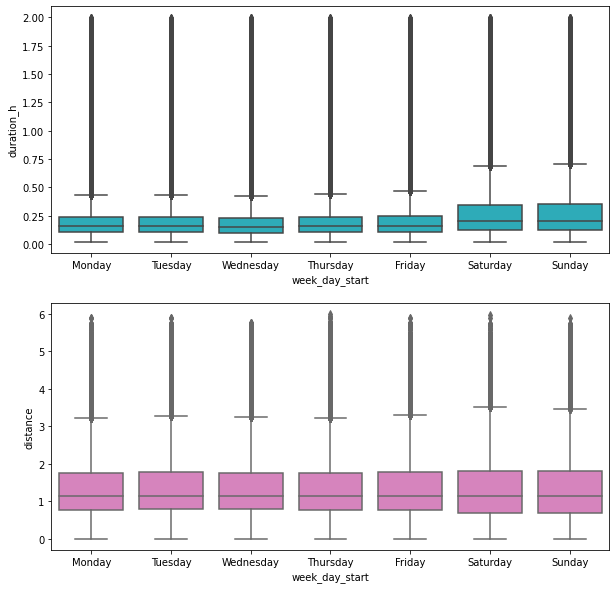

In [37]:
lower_values = trip_data[trip_data['duration_h'] < 2]

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sb.boxplot(data=lower_values, x='week_day_start', y='duration_h', color=blue, order=week_days)

plt.subplot(2,1,2)
sb.boxplot(data=trip_data, x='week_day_start', y='distance', color=purple, order=week_days)
plt.show();

Although not perfect, this figure looks already much better. We can see that mean rental time on the working days is quite similar and counts approximately 0.2 of 1 hour, meaning about 12 minutes (which is close enough to the peak of values from univariate visualizations, which was about 10 minutes). The mean rental time on weekends seems to be slightly higher and have a bigger variance of values. The statistics of the distance variable are very stable despite the day of the week, with a mean distance between stations slightly above 1 km mark. Both variables show long tails of systematically distributed, high values, although the scatter plot above showed that there is no correlation between duration and distance. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * First of all, at the beginning of this section we saw that number of bikers of the three most popular rental stations in San Francisco varies highly depending on the weekday, with lower numbers of customers during the weekends. 
* Further on, we saw that there is basically no relation between for how long the bike was rented and the distance between the start and end station. This could be probably explained by the fact that there are plenty of bike rental stations scattered around the San Francisco area, with close proximity to one another, which gives high variability of choices. The relationship between duration and distance would be probably much more significant, if we could measure the actual distance made on the bike during the rental time, instead of the distance between rental locations, which doesn't allow us to say anything about the distance made by a biker. 
* Lastly, we took a look at the relationships between the numeric variables and the categorical one, by means of boxplots. After scaling the plots a bit, we could see that the distributions of the numeric values are quite steady during the week, with slightly higher duration time in the weekends. In the following visualizations, it might be a good idea to divide those two numeric parameters to perform visualizations separately for low and high numeric values. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Not really, I stayed closely focus on investigating the main four variables of interests. 

## Multivariate Exploration

> I will start off, by creating a combining plot for the main numeric variables (duration and distance) and the categorical variable. It will be a similar plot to the above-created boxplot, but here we will take a better look at mean changes in duration and distance over the week, instead of the distribution of those values. 

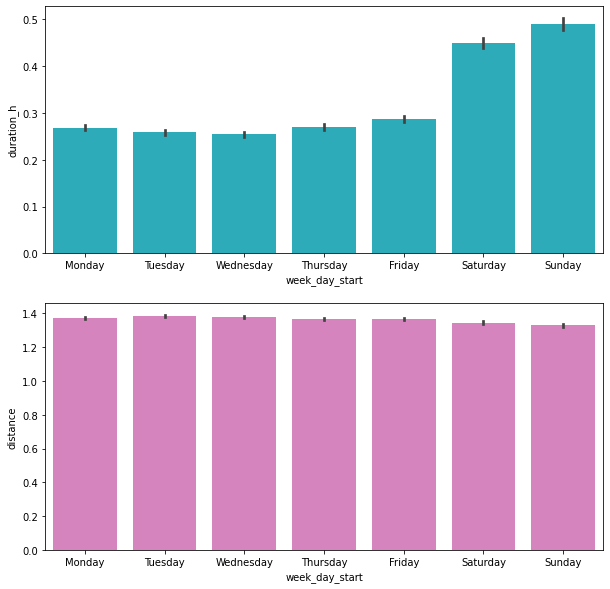

In [38]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sb.barplot(data=trip_data, x='week_day_start', y='duration_h', color=blue, order=week_days)

plt.subplot(2,1,2)
sb.barplot(data=trip_data, x='week_day_start', y='distance', color=purple, order=week_days)
plt.show()

We can clearly observe that the duration time is longer on weekends, with the longest rental time on Sundays. The duration variable is quite stable during the working days, and is approximately 15 minutes, whereas the average renting time on Sunday is slightly under half an hour. The distance variable is very evenly distributed during the week, with an average value of about 1.3 km. 

In [39]:
same_day = np.where((trip_data['week_day_start'] == trip_data['week_day_end']), 0, 1)

In [40]:
trip_data['duration_values'] = np.where((trip_data['duration_sec'] >= 2700), 'High', 'Low')
trip_data['distance_values'] = np.where((trip_data['distance'] >= 2), 'High', 'Low')

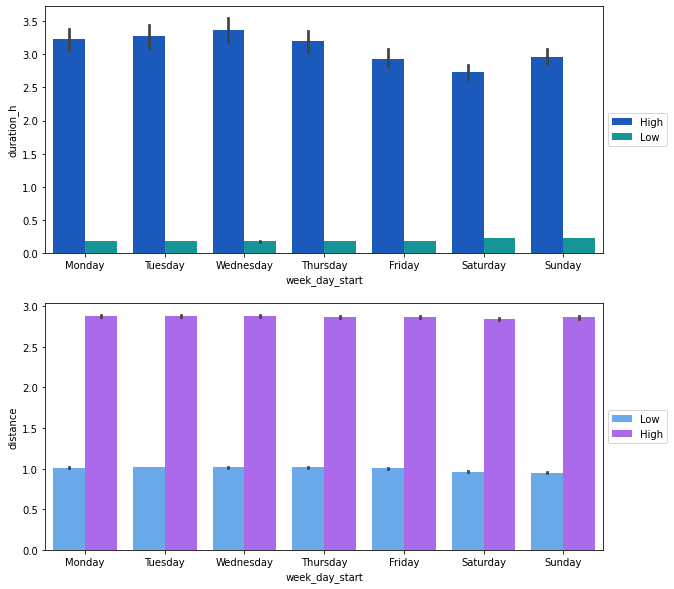

In [41]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(211)
sb.barplot(data=trip_data, x='week_day_start', y='duration_h', hue='duration_values', 
           order=week_days, palette='winter')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(212)
sb.barplot(data=trip_data, x='week_day_start', y='distance', hue='distance_values', 
           order=week_days, palette='cool')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Dividing the distance variable into categories of high and low values didn't bring any further insights, which isn't that surprising given the very equal distribution of this variable in the polt above. The only additional information is that the average distance of the low distance category is about 1 km, whereas the high average distance is almost 3 km. 
Dividing the duration variable into two categories introduces more variability in the data and provides us with a more detailed view of the relationship between those two variables. We can see that Wednesdays have on average the longest duration time, contrary to the above findings which suggested that the longest duration time is on Sundays. This could be explained by the fact that, in general Wednesdays are much busier than Sundays, with a lot of rentals of short duration, which lowers the general average rental time on Wednesdays. Sundays on the other hand, might have generally less traffic, with a smaller number of short rentals, causing the misperception that the rental time on Sundays might be the longest. 

Let's see if the above explanation looks plausible, by simply plotting the count plot of the duration variable separately for each category. 

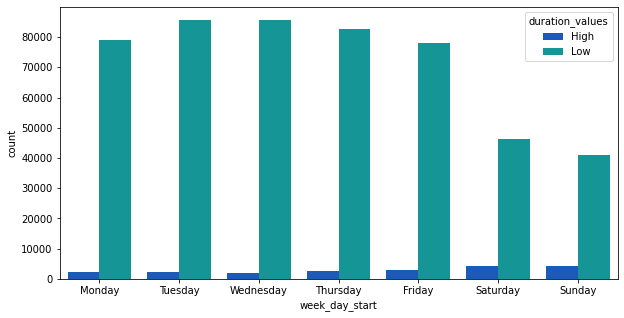

In [42]:
plt.figure(figsize=(10,5))
sb.countplot(data = trip_data, x='week_day_start',hue='duration_values', palette='winter', order=week_days)

Indeed, we can observe that in general there is much more rental traffic on working days, with a high proportion of short duration rentals, which cause the misperception that the rental time is longer during the weekends than working days! 

Lastly, let's see how dividing the duration variable into two categories affects its distribution when plotting violin plots. Here, I will skip making the plots for the different categories of the distance variable, as its distribution proved to be very stable in the figures above. 

In [43]:
data_high_duration = trip_data.loc[trip_data['duration_values'] == 'High']


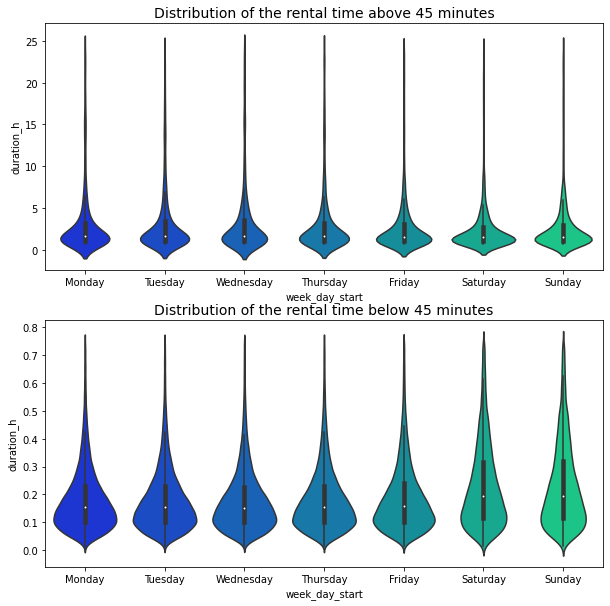

In [44]:
plt.figure(figsize=(10,10))

plt.subplot(211)
data_high_duration = trip_data.loc[trip_data['duration_values'] == 'High']
sb.violinplot(data=data_high_duration, x='week_day_start', y='duration_h', order=week_days, palette='winter')
plt.title('Distribution of the rental time above 45 minutes', fontsize=14)

plt.subplot(212)
data_low_duration = trip_data.loc[trip_data['duration_values'] == 'Low']
sb.violinplot(data=data_low_duration, x='week_day_start', y='duration_h', order=week_days, palette='winter')
plt.title('Distribution of the rental time below 45 minutes', fontsize=14)
plt.show()

In comparison with the above boxplots the clarity of the created plots is much better when the duration variable was divided into two groups. We can clearly see that there is a much higher number of rentals with low duration time and that there are fewer rentals on weekends than during the working days. Moreover, the distribution of the high rental time seems to be much equal during the whole week, with a much smaller variance than those rentals of low duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When comparing the distribution of the duration and distance variables throughout the week, the distance variables showed to be very stable during the whole week, whereas the duration variable appeared to have higher values at the weekends. Dividing those numeric variables into two categories, proved to bring essential insights about the distribution of the rental duration, allowing us to understand the real interactions within the data. 

### Were there any interesting or surprising interactions between features?

> One surprising interaction was how dividing duration time into high and low category affected its distribution, general statistics and helped to better understand the relationship between rental time and weekdays. 